#  알약 정보 EDA

In [1]:
import pandas as pd
import requests
import os, cv2
import matplotlib.pyplot as plt

In [2]:
# 파일 열기
path = './보험코드_낱알식별목록.xlsx'

df = pd.read_excel(path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   폴더번호            105 non-null    int64  
 1   품목일련번호          105 non-null    int64  
 2   품목명             105 non-null    object 
 3   보험코드            105 non-null    int64  
 4   업소일련번호 업체일련번호   105 non-null    int64  
 5   업소명             105 non-null    object 
 6   성상              105 non-null    object 
 7   큰제품이미지          105 non-null    object 
 8   표시앞             105 non-null    object 
 9   표시뒤             53 non-null     object 
 10  의약품제형           105 non-null    object 
 11  색상앞             105 non-null    object 
 12  색상뒤             17 non-null     object 
 13  분할선앞            19 non-null     object 
 14  분할선뒤            20 non-null     object 
 15  크기장축            105 non-null    float64
 16  크기단축            104 non-null    float64
 17  크기두께            105 non-null    flo

In [4]:
# 컬럼별 고유개수
for _ in df.columns:
    print('컬럼 : ', _, '\n고유 개수 : ', len(df[_].unique()))
    print()

컬럼 :  폴더번호 
고유 개수 :  105

컬럼 :  품목일련번호 
고유 개수 :  104

컬럼 :  품목명 
고유 개수 :  105

컬럼 :  보험코드 
고유 개수 :  105

컬럼 :  업소일련번호 업체일련번호 
고유 개수 :  50

컬럼 :  업소명 
고유 개수 :  49

컬럼 :  성상 
고유 개수 :  89

컬럼 :  큰제품이미지 
고유 개수 :  105

컬럼 :  표시앞 
고유 개수 :  91

컬럼 :  표시뒤 
고유 개수 :  38

컬럼 :  의약품제형 
고유 개수 :  6

컬럼 :  색상앞 
고유 개수 :  12

컬럼 :  색상뒤 
고유 개수 :  8

컬럼 :  분할선앞 
고유 개수 :  2

컬럼 :  분할선뒤 
고유 개수 :  3

컬럼 :  크기장축 
고유 개수 :  65

컬럼 :  크기단축 
고유 개수 :  58

컬럼 :  크기두께 
고유 개수 :  61

컬럼 :  이미지생성일자(약학정보원) 
고유 개수 :  65

컬럼 :  분류번호 
고유 개수 :  37

컬럼 :  분류명 
고유 개수 :  37

컬럼 :  전문일반구분 
고유 개수 :  2

컬럼 :  품목허가일자 
고유 개수 :  93

컬럼 :  제형코드명 
고유 개수 :  8

컬럼 :  표기내용앞 
고유 개수 :  9

컬럼 :  표기내용뒤 
고유 개수 :  4

컬럼 :  표기이미지앞 
고유 개수 :  9

컬럼 :  표기이미지뒤 
고유 개수 :  4

컬럼 :  표기코드앞 
고유 개수 :  9

컬럼 :  표기코드뒤 
고유 개수 :  4

컬럼 :  변경일자 
고유 개수 :  85



In [22]:
df['색상뒤'].unique()

array([nan, '하양', '노랑, 옅은', '노랑', '분홍', '갈색', '주황, 투명', '빨강'],
      dtype=object)

### 품목일련번호 중복행 존재

In [5]:
# 위에서 품목일련번호가 중복값이 있는거 확인
print('전체 행 개수 : ', len(df['품목일련번호'].values), '\n고유값 개수 : ', len(df['품목일련번호'].unique()))

전체 행 개수 :  105 
고유값 개수 :  104


In [6]:
# 중복행
df[df['품목일련번호'].duplicated(keep=False)]

,폴더번호,품목일련번호,품목명,보험코드,업소일련번호 업체일련번호,업소명,성상,큰제품이미지,표시앞,표시뒤,...,전문일반구분,품목허가일자,제형코드명,표기내용앞,표기내용뒤,표기이미지앞,표기이미지뒤,표기코드앞,표기코드뒤,변경일자
74,85,200401818,부스론정10밀리그램(부스피론염산염),642201110,19630001,부광약품(주),양면 볼록한 장방형의 백색정제,https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,B분할선K,10,...,전문의약품,20040214,나정,NaN,NaN,NaN,NaN,NaN,NaN,20220517.0
75,86,200401818,부스론정5밀리그램(부스피론염산염),642201100,19630001,부광약품(주),양면 볼록한 장방형의 백색정제,https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,BK,5,...,전문의약품,20040214,나정,NaN,NaN,NaN,NaN,NaN,NaN,20220517.0


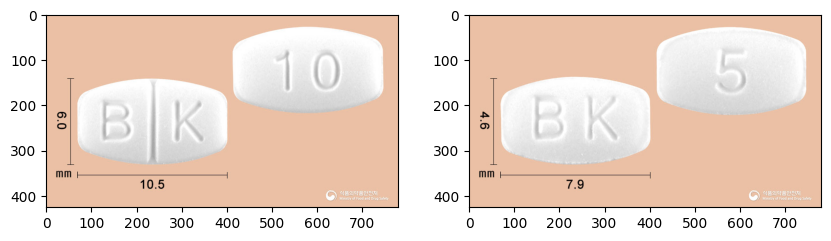

In [7]:
# 위 이미지 확인
one_img = cv2.imread('./org_img/85.jpg')
two_img = cv2.imread('./org_img/86.jpg')

plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.imshow(one_img)

plt.subplot(1,2,2)
plt.imshow(two_img)

### 크기가 같으면서 색상도 같은 알약있는지 확인

In [8]:
df.columns

Index(['폴더번호', '품목일련번호', '품목명', '보험코드', '업소일련번호 업체일련번호', '업소명', '성상', '큰제품이미지',
       '표시앞', '표시뒤', '의약품제형', '색상앞', '색상뒤', '분할선앞', '분할선뒤', '크기장축', '크기단축',
       '크기두께', '이미지생성일자(약학정보원)', '분류번호', '분류명', '전문일반구분', '품목허가일자', '제형코드명',
       '표기내용앞', '표기내용뒤', '표기이미지앞', '표기이미지뒤', '표기코드앞', '표기코드뒤', '변경일자'],
      dtype='object')

#### OCR 미적용시

In [9]:
need_col = ['의약품제형', '색상앞', '색상뒤',  '크기장축', '크기단축', '크기두께']
dupl_df = df[df[need_col].duplicated(keep=False)]
dupl_df

,폴더번호,품목일련번호,품목명,보험코드,업소일련번호 업체일련번호,업소명,성상,큰제품이미지,표시앞,표시뒤,...,전문일반구분,품목허가일자,제형코드명,표기내용앞,표기내용뒤,표기이미지앞,표기이미지뒤,표기코드앞,표기코드뒤,변경일자
10,11,201003191,부광아데포비어정10밀리그램(아데포비어디피복실),642203020,19630001,부광약품(주),백색 또는 회백색 원형 정제,https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,마크AD,NaN,...,전문의약품,20100430,나정,"川,≡",NaN,https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,NaN,r0008,NaN,20170916.0
47,54,199800723,아타칸정16밀리그램(칸데사르탄실렉세틸),642100970,19560004,(주)유한양행,양면이 볼록한 원형의 분홍색 정제,https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,A분할선CH,016,...,전문의약품,19980701,나정,NaN,NaN,NaN,NaN,NaN,NaN,20200213.0
48,55,199800725,아타칸정8밀리그램(칸데사르탄실렉세틸),642100960,19560004,(주)유한양행,양면이 볼록한 원형의 밝은 분홍색 정제,https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,A분할선CG,008,...,전문의약품,19980701,나정,NaN,NaN,NaN,NaN,NaN,NaN,20200928.0
56,65,199501953,신일티아민염산염정10밀리그램,653801460,19560015,신일제약(주),흰색의 원형 정제,https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,10,SIL,...,일반의약품,19951004,나정,NaN,NaN,NaN,NaN,NaN,NaN,20211115.0


In [10]:
dupl_df[['폴더번호','품목일련번호', '품목명', '의약품제형', '색상앞', '색상뒤', '분할선앞', '분할선뒤', '크기장축', '크기단축', '크기두께']]

,폴더번호,품목일련번호,품목명,의약품제형,색상앞,색상뒤,분할선앞,분할선뒤,크기장축,크기단축,크기두께
10,11,201003191,부광아데포비어정10밀리그램(아데포비어디피복실),원형,하양,NaN,NaN,NaN,7.0,7.0,3.0
47,54,199800723,아타칸정16밀리그램(칸데사르탄실렉세틸),원형,분홍,NaN,-,NaN,7.0,7.0,3.1
48,55,199800725,아타칸정8밀리그램(칸데사르탄실렉세틸),원형,분홍,NaN,-,NaN,7.0,7.0,3.1
56,65,199501953,신일티아민염산염정10밀리그램,원형,하양,NaN,NaN,NaN,7.0,7.0,3.0


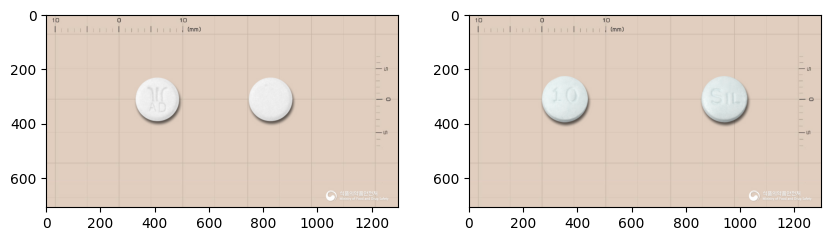

In [11]:
# 이미지확인

# 위 이미지 확인
one_img = cv2.imread('./org_img/11.jpg')
two_img = cv2.imread('./org_img/65.jpg')
three_img = cv2.imread('./org_img/54.jpg')
fore_img = cv2.imread('./org_img/55.jpg')

plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.imshow(one_img)

plt.subplot(1,2,2)
plt.imshow(two_img)

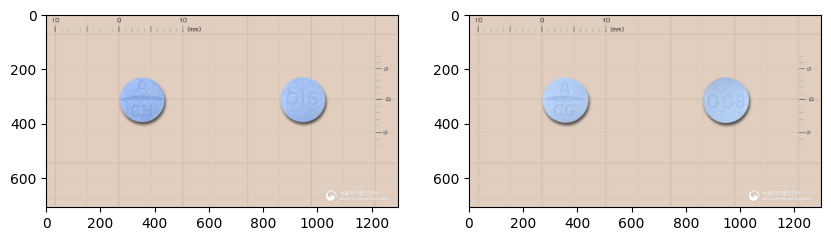

In [12]:
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.imshow(three_img)

plt.subplot(2,2,2)
plt.imshow(fore_img)

#### OCR 적용시

In [13]:
need_col = ['표시앞', '표시뒤','의약품제형', '색상앞', '색상뒤', '분할선앞', '분할선뒤', '크기장축', '크기단축', '크기두께']

dupl_df = df[df[need_col].duplicated(keep=False)]
dupl_df

,폴더번호,품목일련번호,품목명,보험코드,업소일련번호 업체일련번호,업소명,성상,큰제품이미지,표시앞,표시뒤,...,전문일반구분,품목허가일자,제형코드명,표기내용앞,표기내용뒤,표기이미지앞,표기이미지뒤,표기코드앞,표기코드뒤,변경일자


### 알약 모양이랑 색상이 동일할 경우

In [14]:
need_col = ['의약품제형', '색상앞', '색상뒤']
color_df = df[df[need_col].duplicated(keep=False)]
color_df

,폴더번호,품목일련번호,품목명,보험코드,업소일련번호 업체일련번호,업소명,성상,큰제품이미지,표시앞,표시뒤,...,전문일반구분,품목허가일자,제형코드명,표기내용앞,표기내용뒤,표기이미지앞,표기이미지뒤,표기코드앞,표기코드뒤,변경일자
0,1,202107807,아빌리파이정1밀리그램(아리피프라졸),649900540,19830009,한국오츠카제약(주),"흰색의 장방형 정제 (각인 A-005, 1)",https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,A-0051,NaN,...,전문의약품,20211203,나정,NaN,NaN,NaN,NaN,NaN,NaN,20221124.0
1,2,200202889,아빌리파이정10밀리그램(아리피프라졸),649900120,19830009,한국오츠카제약(주),분홍색의 장방형 정제(각인 A-008 10),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,A-008 10,NaN,...,전문의약품,20020801,나정,NaN,NaN,NaN,NaN,NaN,NaN,20221004.0
2,3,200202890,아빌리파이정15밀리그램(아리피프라졸),649900130,19830009,한국오츠카제약(주),황색의 원형 정제(각인 A-009 15),https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,A-009 15,NaN,...,전문의약품,20020801,나정,NaN,NaN,NaN,NaN,NaN,NaN,20221004.0
5,6,199001232,원알파정(알파칼시돌),655401180,19700003,일성신약(주),흰색의 원형 나정,https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,0.5,분할선,...,일반의약품,19900611,나정,NaN,NaN,NaN,NaN,NaN,NaN,20150817.0
6,7,199100413,일동올베탐캡슐(아시피목스),642901790,19540006,일동제약(주),"백색~유백색의 가루가 들어있는 상부 적갈색, 하부 백색의 경질캡슐제",https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,IDP OBT,NaN,...,전문의약품,19910820,"경질캡슐제, 산제",NaN,NaN,NaN,NaN,NaN,NaN,20190718.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,116,199300959,코디핀정4밀리그램(베니디핀염산염),642401330,19620008,영진약품(주),이약은 황색의 원형제피정이다,https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,CN4,NaN,...,전문의약품,19931216,필름코팅정,NaN,NaN,NaN,NaN,NaN,NaN,20130129.0
101,117,200907783,코디핀정6밀리그램(베니디핀염산염),642402790,19620008,영진약품(주),이약은 황색의 원형제피정이다,https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,CN,6,...,전문의약품,20091029,필름코팅정,NaN,NaN,NaN,NaN,NaN,NaN,20130129.0
102,118,199300960,코디핀정8밀리그램(베니디핀염산염),642401340,19620008,영진약품(주),이약은 황색의 원형제피정이다,https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,CN8,NaN,...,전문의약품,19931216,필름코팅정,NaN,NaN,NaN,NaN,NaN,NaN,20130129.0
103,119,199001354,부광코멜리안정50밀리그램(딜라제프염산염수화물),642201040,19630001,부광약품(주),흰색의 원형 필름코팅정,https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,BK,CM5,...,전문의약품,19900330,필름코팅정,NaN,NaN,NaN,NaN,NaN,NaN,20220906.0


### 

# EDA 결론

1. 폴더번호 85, 86 두 알약은 약에 들어간 부스론정 10mg, 5mg 차이 가있는데 품목일련번호 동일함<br>
장축, 단축, 두께는 다름<br>※이미지 확인 필요<br><br>
2. '의약품제형', '색상앞', '색상뒤', '분할선앞', '분할선뒤', '크기장축', '크기단축', '크기두께' 이렇게 중복된 데이터가 있는지 확인 한 결과 총 4건이 발생.

### 원본 이미지 다운

In [15]:
url = df['큰제품이미지'].to_list()
save_name = df['폴더번호'].to_list()

In [16]:
aa
if os.path.exists('./org_img/') == False:
    print('폴더 생성')
    os.mkdir('./org_img/')

for download, file_name in zip(url, save_name):
    respone = requests.get(download)
    state = respone.status_code

    if state == 200:
        save_path = f'./org_img/{file_name}.jpg'
        open(save_path, 'wb').write(respone.content)
        print('다운 완료')
    
    else:
        print(f'폴더번호 : {save_name}\n url : {download}')

NameError: name 'aa' is not defined